#### __***SHAP on Machine Learning Models***__

#### __***Test Data***__

In [9]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
texts = [
    "I love this movie",
    "This was a great experience",
    "Absolutely fantastic",
    "Terrible, I hated it",
    "Worst product ever",
    "Not good at all"
]
labels = [1, 1, 1, 0, 0, 0]

In [3]:
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=10)
y = np.array(labels)

In [4]:
model = Sequential([
    Embedding(input_dim=1000, output_dim=16),
    LSTM(16),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=10, verbose=0)

In [5]:
sample_texts = [
    "I love this product",
    "Worst experience ever",
    "It was okay, nothing special"
]
sample_seq = tokenizer.texts_to_sequences(sample_texts)
X_sample = pad_sequences(sample_seq, maxlen=10)

In [6]:
def predict_fn(x):
    return model.predict(x)

In [7]:
explainer = shap.Explainer(predict_fn, X)
shap_values = explainer(X_sample)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step



Force plot for: "I love this product"


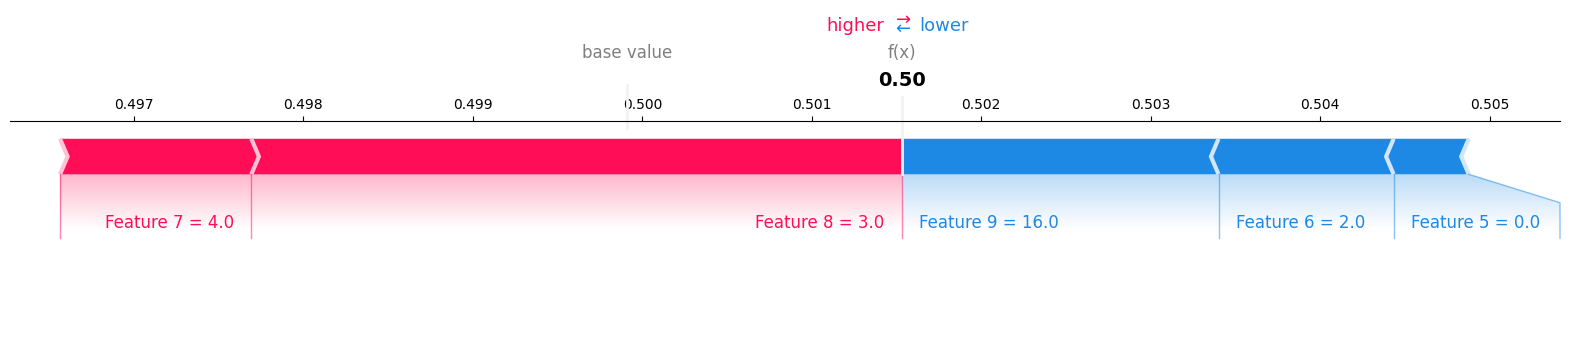


Force plot for: "Worst experience ever"


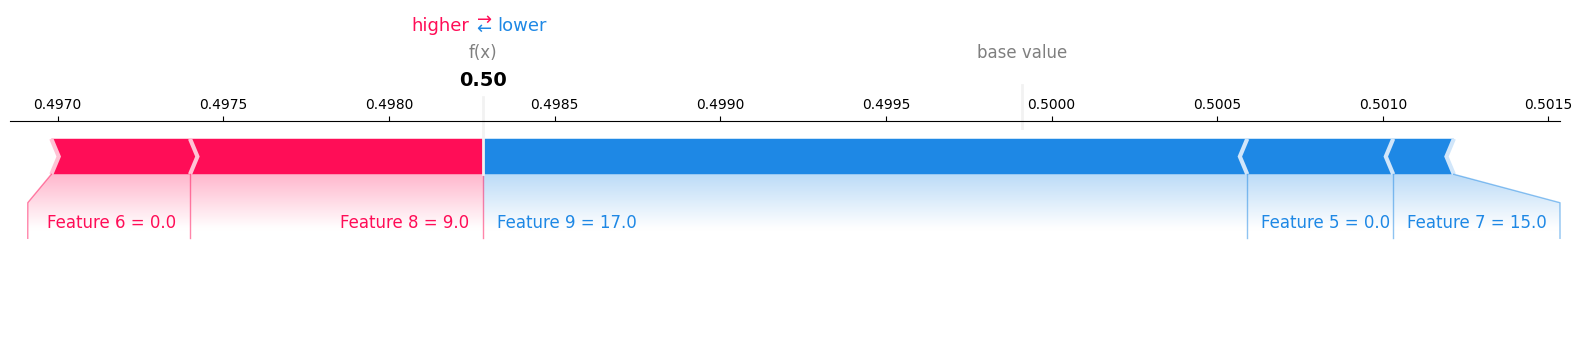


Force plot for: "It was okay, nothing special"


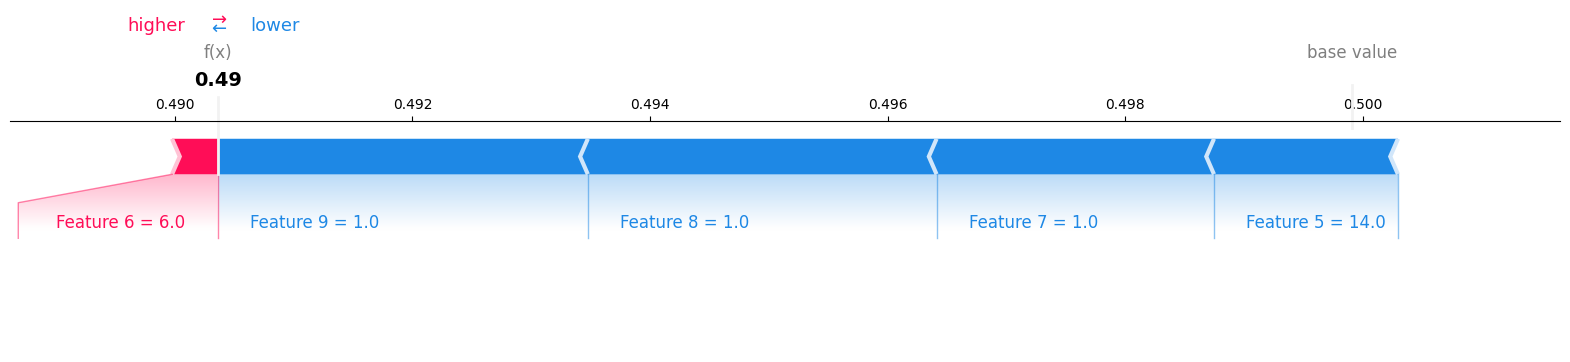


Waterfall plot for first input:


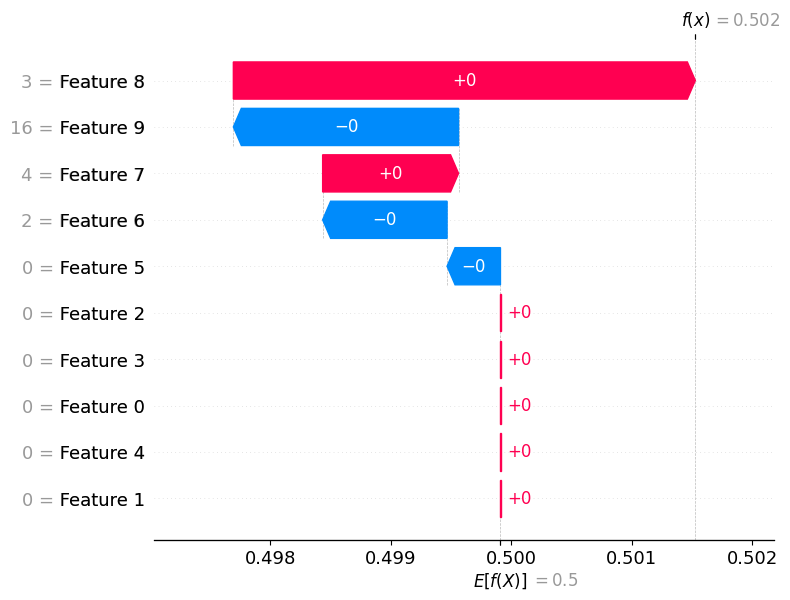


Summary bar plot (all samples):


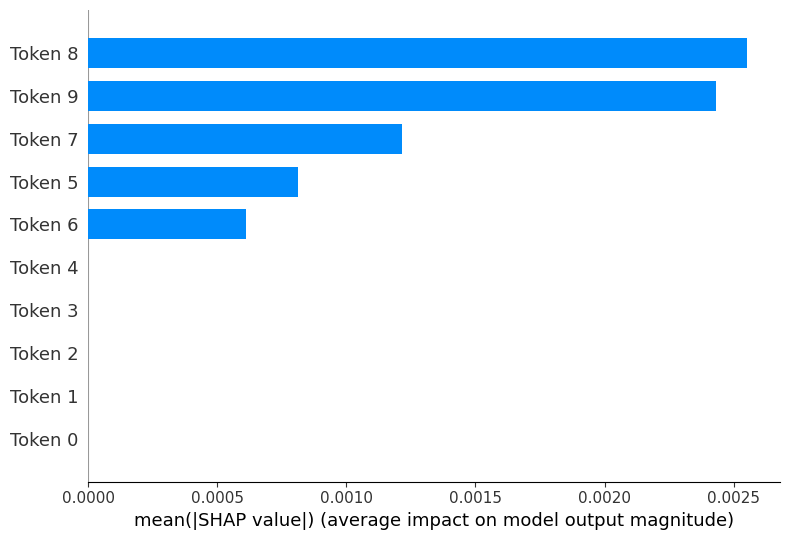


Summary dot plot (all samples):


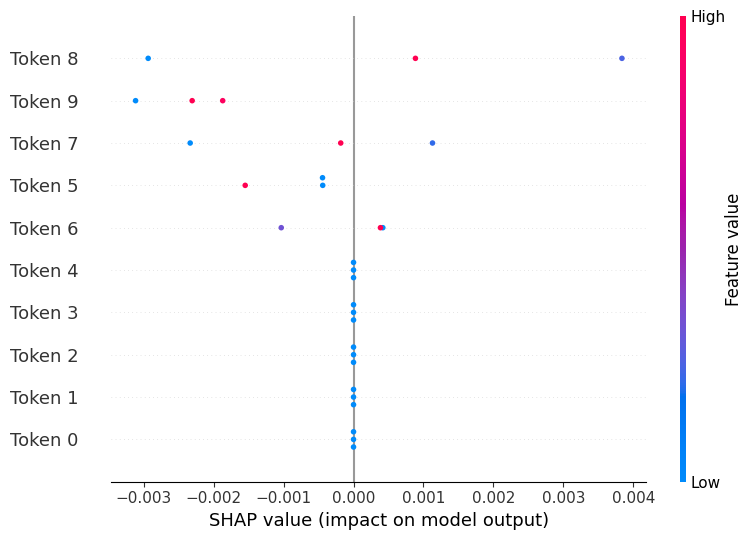

In [8]:
inv_vocab = {v: k for k, v in tokenizer.word_index.items()}
decoded_samples = [[inv_vocab.get(i, '') for i in seq if i != 0] for seq in sample_seq]

for i in range(len(X_sample)):
    print(f"\nForce plot for: \"{sample_texts[i]}\"")
    valid_tokens = [inv_vocab.get(idx, '[PAD]') for idx in X_sample[i] if idx != 0]
    shap.plots.force(shap_values[i], matplotlib=True)

print("\nWaterfall plot for first input:")
shap.plots.waterfall(shap_values[0])

print("\nSummary bar plot (all samples):")
shap.summary_plot(shap_values, feature_names=[f"Token {i}" for i in range(X.shape[1])], plot_type="bar")

print("\nSummary dot plot (all samples):")
shap.summary_plot(shap_values, feature_names=[f"Token {i}" for i in range(X.shape[1])], plot_type="dot")